### Converting Between CSV and GeoTIFF

In [28]:
from osgeo import gdal
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [29]:
ds = gdal.Open('data/dem/north_mexico_clip.tif')

In [6]:
ar = ds.GetRasterBand(1).ReadAsArray()
ar = ar.astype(np.int16)
print(np.max(ar))

76


(-0.5, 7811.5, 6088.5, -0.5)

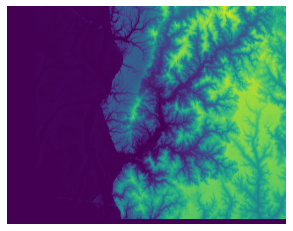

In [7]:
fig = plt.subplots()
plt.imshow(band, vmin=0, vmax=80)
plt.axis('off')

In [30]:
gt = ds.GetGeoTransform()

res_x = gt[1]
res_y = gt[5]
xmin = gt[0]
ymax = gt[3]

xsize = ds.RasterXSize # number of pixels in x axis
ysize = ds.RasterYSize # number of pixels in y axis

print(f'Origin (x, y): {xmin}, {ymax}')
print(f'Original dimensions: X {xsize}, Y {ysize}')
print(f'Pixel size: X {res_x}m Y {res_y}m')

Origin (x, y): 978102.0, 3420441.0
Original dimensions: X 7812, Y 6089
Pixel size: X 3.0m Y -3.0m


Generate an XYZ file half the size of the original file

In [31]:
out_width = int(xsize / 2)
out_height = int(ysize / 2)
print(f'New size (x, y): {out_width} {out_height}')

New size (x, y): 3906 3044


In [32]:
out_xmin = xmin + out_width * res_x
out_ymax = ymax + out_height * res_y
out_xmax = out_xmin + (xsize - out_width) * res_x
out_ymin = out_ymax - (ysize - out_height) * res_x
bounds = [out_xmin, out_ymin, out_xmax, out_ymax]
print(bounds)
print(f'{out_xmax - out_xmin}, {out_ymax - out_ymin}')

[989820.0, 3402174.0, 1001538.0, 3411309.0]
11718.0, 9135.0


In [33]:
ds_mask = gdal.Warp('output/north_mexico_clip_mask.tiff', ds, outputBounds=bounds)

In [34]:
gt = ds_mask.GetGeoTransform()

res = gt[1]

xmin = gt[0]
ymax = gt[3]

xsize = ds_mask.RasterXSize # number of pixels in x axis
ysize = ds_mask.RasterYSize # number of pixels in y axis

In [35]:
# Coordinates of the center of the upper left pixel
xstart = xmin + res/2
ystart = -(ymax - res/2)

In [36]:
x_coords = np.arange(xstart, xstart + xsize * res, res)
y_coords = np.arange(ystart, ystart - ysize * res, -res)

In [37]:
# repeat ysize times, each of the values in x_coords
x = np.tile(x_coords, ysize)
# repeat y_coords xsize times
y = np.repeat(y_coords, xsize)

In [27]:
xyz = gdal.Translate('output/north_mexico_clip.xyz', ds_mask)
df = pd.read_csv('output/north_mexico_clip.xyz', sep=' ', header=None)
df.columns = ['x', 'y', 'value']
df.to_csv('output/north_mexico_clip.csv', index=False)

In [38]:
# ds_mask = gdal.Open('output/north_mexico_clip_mask.tiff')
ar = ds_mask.GetRasterBand(1).ReadAsArray()
ar = ar.astype(np.int16)
flatten = ar.flatten()

In [39]:
dfn = pd.DataFrame(dict(x=x, y=y, value=flatten))
dfn.tail()

,x,y,value
11893765,1001524.5,-3420439.5,0
11893766,1001527.5,-3420439.5,0
11893767,1001530.5,-3420439.5,0
11893768,1001533.5,-3420439.5,0
11893769,1001536.5,-3420439.5,0


In [41]:
np.min(flatten)

-4

In [45]:
xyz = None
ds_mask = None
ds = None

In [42]:
shape = ar.shape
ar[int(shape[0] / 2):, int(shape[1] / 2):]

array([[33, 33, 33, ..., 52, 52, 52],
       [33, 33, 33, ..., 52, 52, 52],
       [34, 34, 34, ..., 52, 52, 52],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int16)

None


In [43]:
vmin = np.min(ar)
vmax = np.max(ar)
print(f'min: {vmin}, max: {vmax}')

min: -4, max: 70


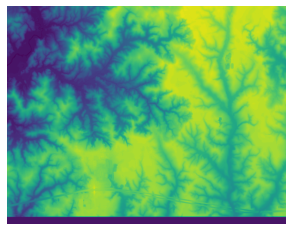

In [46]:
fig = plt.subplots()
plt.imshow(ar, vmin=vmin, vmax=vmax)
plt.axis('off')
plt.show()